# Analysis

### Data Import

In [1]:
import os
import bokeh
from bokeh.plotting import show
import pandas as pd
import numpy as np
import torch

import flowkit as fk
import seaborn as sns
import matplotlib.pyplot as plt

bokeh.io.output_notebook()

Loading BokehJS ...

In [2]:
#load in patient dataset
flow_data = pd.read_csv("flow_data.csv")
flow_data

,Subject Accession,FCS Raw,FCS Preprocessed,WSP File,HAI Mean,HAI Class
0,SUB120420,Panel_L1_A1_L1_110194_PBMC_10112011_A01.580227...,export_Panel_L1_A1_L1_110194_PBMC_10112011_A01...,Panel_L1_Run_2.804556.wsp,4.666667,0
1,SUB120423,Panel_L1_A2_L1_110197_PBMC_10112011_A02.579447...,export_Panel_L1_A2_L1_110197_PBMC_10112011_A02...,Panel_L1_Run_1.804538.wsp,5.333333,0
2,SUB120445,Panel_L1_A3_L1_110243_PBMC_10172011_A03.578999...,export_Panel_L1_A3_L1_110243_PBMC_10172011_A03...,Panel_L1_Run_4.804574.wsp,4.666667,0
3,SUB120446,Panel_L1_A1_L1_110244_PBMC_10172011_A01.579604...,export_Panel_L1_A1_L1_110244_PBMC_10172011_A01...,Panel_L1_Run_5.804583.wsp,8.000000,1
4,SUB120449,Panel_L1_E3_L1_110247_PBMC_10172011_E03.580335...,export_Panel_L1_E3_L1_110247_PBMC_10172011_E03...,Panel_L1_Run_4.804574.wsp,7.666667,1
5,SUB120450,Panel_L1_E1_L1_110248_PBMC_10172011_E01.578572...,export_Panel_L1_E1_L1_110248_PBMC_10172011_E01...,Panel_L1_Run_5.804583.wsp,5.000000,0
6,SUB120452,Panel_L1_A2_L1_110250_PBMC_10172011_A02.579307...,export_Panel_L1_A2_L1_110250_PBMC_10172011_A02...,Panel_L1_Run_5.804583.wsp,7.000000,1
7,SUB120457,Panel_L1_E2_L1_110255_PBMC_10172011_E02.580138...,export_Panel_L1_E2_L1_110255_PBMC_10172011_E02...,Panel_L1_Run_5.804583.wsp,6.333333,0
8,SUB120458,Panel_L1_A3_L1_110256_PBMC_10172011_A03.579670...,export_Panel_L1_A3_L1_110256_PBMC_10172011_A03...,Panel_L1_Run_5.804583.wsp,6.333333,0
9,SUB120459,Panel_L1_A1_L1_110257_PBMC_10172011_A01.580299...,export_Panel_L1_A1_L1_110257_PBMC_10172011_A01...,Panel_L1_Run_6.804592.wsp,6.000000,0


In [3]:
cytof_data = pd.read_csv("cytof_data.csv")
cytof_data

,Subject Accession,FCS Raw,FCS Preprocessed,HAI Mean,HAI Class
0,SUB116519,083012-Mike-Study 15-2011-V1-15103_cells_found...,083012-Mike-Study 15-2011-V1-15103_cells_found...,8.655261,1
1,SUB116523,083012-Mike-Study 15-2011-V1-15107_cells_found...,083012-Mike-Study 15-2011-V1-15107_cells_found...,6.321928,0
2,SUB116524,083012-Mike-Study 15-2011-V1-15108_cells_found...,083012-Mike-Study 15-2011-V1-15108_cells_found...,6.988595,0
3,SUB116525,083012-Mike-Study 15-2011-V1-15109_cells_found...,083012-Mike-Study 15-2011-V1-15109_cells_found...,7.321928,1
4,SUB116526,083012-Mike-Study 15-2011-V1-15110_cells_found...,083012-Mike-Study 15-2011-V1-15110_cells_found...,5.321928,0
5,SUB116527,083012-Mike-Study 15-2011-V1-15111_cells_found...,083012-Mike-Study 15-2011-V1-15111_cells_found...,7.321928,1
6,SUB116528,083012-Mike-Study 15-2011-V1-15112_cells_found...,083012-Mike-Study 15-2011-V1-15112_cells_found...,7.655261,1
7,SUB116529,083012-Mike-Study 15-2011-V1-15113_cells_found...,083012-Mike-Study 15-2011-V1-15113_cells_found...,7.655261,1
8,SUB116530,083012-Mike-Study 15-2011-V1-15114_cells_found...,083012-Mike-Study 15-2011-V1-15114_cells_found...,6.988595,0
9,SUB116531,083012-Mike-Study 15-2011-V1-15115_cells_found...,083012-Mike-Study 15-2011-V1-15115_cells_found...,7.655261,1


In [26]:
#Sample Extraction Function
def extractFCSDF(fileName, set, partition = "base", source = "Raw"):
    #Set: CyTOF or Flow
    path = ""
    if source == "Preprocessed":
        path = os.path.join("FCS", set, "Preprocessed", fileName)
    else:
        path = os.path.join("FCS", set, "Raw", fileName)
    sample = None
    if set == "CyTOF":
        sample = fk.Sample(path)
        t = fk.transforms.WSPBiexTransform(negative=0, width=-20, positive=5, max_value=199490)
        sample.apply_transform(t)
        sample = sample.as_dataframe()
        sample.drop(['Time','Cell_length','(In115)Dd','(Nd142)Dd','(Nd146)Dd','(Sm147)Dd','(Sm149)Dd','(Sm154)Dd','(Gd156)Dd',
                     '(Dy164)Dd','(Ho165)Dd','(Er166)Dd','(Er168)Dd','(Er170)Dd','(Yb171)Dd','(Yb174)Dd','(Yb176)Dd',
                    '(Ir191)Dd','(Ir193)Dd'], level = 0, axis = 1, inplace = True)
    if set == "Flow":
        sample = fk.Sample(path)
        t = fk.transforms.WSPBiexTransform(negative=0, width=-100, positive=4.48, max_value=300000)
        sample.apply_transform(t)
        sample = sample.as_dataframe()
        sample.drop(['FSC-A','FSC-H','FSC-W','SSC-A','SSC-H','SSC-W','Time'], level = 0, axis = 1, inplace = True)
        sample = sample.iloc[:,[6,1,7,0,3,4,5,2,8]]
    sample.columns = sample.columns.droplevel()
    if partition == "known":
        sample = sample.iloc[:,[2, 5, 6, 8]]
    return sample

In [5]:
s = extractFCSDF("083012-Mike-Study 15-2011-V1-15103_cells_found_preprocessed.fcs", "CyTOF", partition = "known", source = "Preprocessed")
s

pns,CD3,CCR7,CD45RA,HLADR
0,529.665010,554.371581,1317.589477,1997.696231
1,1154.370501,528.456224,1851.569346,570.263163
2,763.902462,1028.773099,637.616422,524.728425
3,1309.738624,1025.403300,546.073136,611.914617
4,527.381631,526.996530,596.343621,972.093862
...,...,...,...,...
187108,1195.656943,571.638706,1212.051046,538.865694
187109,1106.315339,578.955249,523.608158,528.522919
187110,1096.946783,752.169845,1694.149538,525.636205
187111,1294.585619,798.311419,669.599637,531.134288


In [6]:
import seaborn as sns

<Axes: ylabel='Density'>

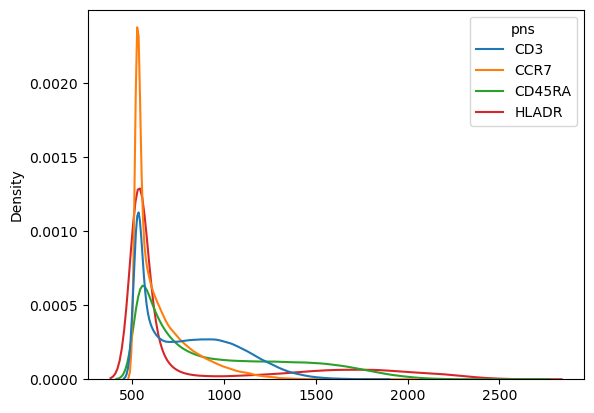

In [7]:
sns.kdeplot(s)

### Necessary Modules

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math

#### Modules from Set Transform Paper (Lee et al)

In [9]:
# Multihead Attention Block
class MAB(nn.Module):
    def __init__(self, dim_Q, dim_K, dim_V, num_heads, ln=False):
        super(MAB, self).__init__()
        self.dim_V = dim_V
        self.num_heads = num_heads
        self.fc_q = nn.Linear(dim_Q, dim_V)
        self.fc_k = nn.Linear(dim_K, dim_V)
        self.fc_v = nn.Linear(dim_K, dim_V)
        if ln:
            self.ln0 = nn.LayerNorm(dim_V)
            self.ln1 = nn.LayerNorm(dim_V)
        self.fc_o = nn.Linear(dim_V, dim_V)

    def forward(self, Q, K):
        Q = self.fc_q(Q)
        K, V = self.fc_k(K), self.fc_v(K)
        dim_split = self.dim_V // self.num_heads
        Q_ = torch.cat(Q.split(dim_split, 2), 0)
        K_ = torch.cat(K.split(dim_split, 2), 0)
        V_ = torch.cat(V.split(dim_split, 2), 0)

        A = torch.softmax(Q_.bmm(K_.transpose(1,2))/math.sqrt(self.dim_V), 2)
        O = torch.cat((Q_ + A.bmm(V_)).split(Q.size(0), 0), 2)
        O = O if getattr(self, 'ln0', None) is None else self.ln0(O)
        O = O + F.relu(self.fc_o(O))
        O = O if getattr(self, 'ln1', None) is None else self.ln1(O)
        return O

In [10]:
# Self Attention Block
class SAB(nn.Module):
    def __init__(self, dim_in, dim_out, num_heads, ln=False):
        super(SAB, self).__init__()
        self.mab = MAB(dim_in, dim_in, dim_out, num_heads, ln=ln)

    def forward(self, X):
        return self.mab(X, X)

In [11]:
# Induced Self Attention BLock
class ISAB(nn.Module):
    def __init__(self, dim_in, dim_out, num_heads, num_inds, ln=False):
        super(ISAB, self).__init__()
        self.I = nn.Parameter(torch.Tensor(1, num_inds, dim_out))
        nn.init.xavier_uniform_(self.I)
        self.mab0 = MAB(dim_out, dim_in, dim_out, num_heads, ln=ln)
        self.mab1 = MAB(dim_in, dim_out, dim_out, num_heads, ln=ln)

    def forward(self, X):
        H = self.mab0(self.I.repeat(X.size(0), 1, 1), X)
        return self.mab1(X, H)

In [12]:
# Pooling by Multihead Attention
class PMA(nn.Module):
    def __init__(self, dim, num_heads, num_seeds, ln=False):
        super(PMA, self).__init__()
        self.S = nn.Parameter(torch.Tensor(1, num_seeds, dim))
        nn.init.xavier_uniform_(self.S)
        self.mab = MAB(dim, dim, dim, num_heads, ln=ln)

    def forward(self, X):
        return self.mab(self.S.repeat(X.size(0), 1, 1), X)

#### Design of Wodinger Paper
ISAB --> ISAB --> ISAB --> Linear Layer (row wise) to one dimension

In [13]:
class HAITiterPredictor(nn.Module):
    """
    Modified Set Transformer for predicting H1, H3, and B values from flow cytometry data
    
    Args:
        num_markers: Number of markers in the FCS file
        dim_hidden: Dimension of hidden representation
        num_heads: Number of attention heads
        num_inds: Number of induced points for ISAB
        hidden_layers: Number of hidden layers
        layer_norm: Whether to use layer normalization
    """
    def __init__(self, 
                 num_markers, 
                 dim_hidden=32, 
                 num_heads=4, 
                 num_inds=16,
                 hidden_layers=2,
                 layer_norm=True,
                 dropout=0.1):
        super(HAITiterPredictor, self).__init__()
        
        # Store configuration
        self.num_markers = num_markers
        
        # Encoder - processes each cell as part of a set
        enc_layers = [ISAB(num_markers, dim_hidden, num_heads, num_inds, ln=layer_norm)]
        for _ in range(1, hidden_layers):
            enc_layers.append(ISAB(dim_hidden, dim_hidden, num_heads, num_inds, ln=layer_norm))
        self.enc = nn.Sequential(*enc_layers)
        
        # Pooling Multi-head Attention to aggregate cell information
        self.pma = PMA(dim_hidden, num_heads, 1)  # Single output representation
        
        # MLP for predicting the three titer values
        self.mlp = nn.Sequential(
            nn.Linear(dim_hidden, dim_hidden),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(dim_hidden, dim_hidden // 2),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(dim_hidden // 2, 1),  
            #nn.Sigmoid()
        )
        
    def forward(self, x):
        """
        Args:
            x: Input tensor of shape [batch_size, num_cells, num_markers]
                where each sample contains a variable number of cells
                
        Returns:
            Tensor of shape [batch_size, 3] with predicted H1, H3, B values
        """
        # Apply set transformer to process all cells
        h = self.enc(x)  # [batch_size, num_cells, dim_hidden]
        
        # Aggregate cell information using PMA
        h = self.pma(h)  # [batch_size, 1, dim_hidden]
        
        # Predict titer values
        titer_preds = self.mlp(h.squeeze(1))  # [batch_size, 1]
        titer_preds = torch.sigmoid(titer_preds)
        
        return titer_preds

23

0     083012-Mike-Study 15-2011-V1-15103_cells_found...
1     083012-Mike-Study 15-2011-V1-15107_cells_found...
2     083012-Mike-Study 15-2011-V1-15108_cells_found...
3     083012-Mike-Study 15-2011-V1-15109_cells_found...
4     083012-Mike-Study 15-2011-V1-15110_cells_found...
5     083012-Mike-Study 15-2011-V1-15111_cells_found...
6     083012-Mike-Study 15-2011-V1-15112_cells_found...
7     083012-Mike-Study 15-2011-V1-15113_cells_found...
8     083012-Mike-Study 15-2011-V1-15114_cells_found...
9     083012-Mike-Study 15-2011-V1-15115_cells_found...
10    083012-Mike-Study 15-2011-V1-15118_cells_found...
11    090512-Study 15-2011-15120_cells_found_preproc...
12    083012-Mike-Study 15-2011-V1-15121_cells_found...
13    090512-Study 15-2011-15122_cells_found_preproc...
14    090712-Mike-Study 15-2011-15010_cells_found_pr...
15    090512-Study 15-2011-15018_cells_found_preproc...
16    090512-Study 15-2011-15019_cells_found_preproc...
17    090712-Mike-Study 15-2011-15020_cells_foun

0    082812-Mike-Study 15-2011-15079_cells_found_pr...
1    082812-Mike-Study 15-2011-15090_cells_found_pr...
2    090512-Study 15-2011-15092_cells_found_preproc...
3    083012-Mike-Study 15-2011-V1-15094_cells_found...
4    083012-Mike-Study 15-2011-V1-15095_cells_found...
5    082812-Mike-Study 15-2011-15096_cells_found_pr...
Name: FCS Preprocessed, dtype: object

Epoch 1/100: Train Loss = 0.7092, Val Loss = 0.7207
Epoch 2/100: Train Loss = 0.6902, Val Loss = 0.7187
Epoch 3/100: Train Loss = 0.6891, Val Loss = 0.7171
Epoch 4/100: Train Loss = 0.6885, Val Loss = 0.7169
Epoch 5/100: Train Loss = 0.6908, Val Loss = 0.7166
Epoch 6/100: Train Loss = 0.6886, Val Loss = 0.7158
Epoch 7/100: Train Loss = 0.6881, Val Loss = 0.7151
Epoch 8/100: Train Loss = 0.6880, Val Loss = 0.7152
Epoch 9/100: Train Loss = 0.6880, Val Loss = 0.7140
Epoch 10/100: Train Loss = 0.6875, Val Loss = 0.7140
Epoch 11/100: Train Loss = 0.6875, Val Loss = 0.7139
Epoch 12/100: Train Loss = 0.6874, Val Loss = 0.7138
Epoch 13/100: Train Loss = 0.6872, Val Loss = 0.7131
Epoch 14/100: Train Loss = 0.6879, Val Loss = 0.7133
Epoch 15/100: Train Loss = 0.6870, Val Loss = 0.7124
Epoch 16/100: Train Loss = 0.6867, Val Loss = 0.7121
Epoch 17/100: Train Loss = 0.6870, Val Loss = 0.7115
Epoch 18/100: Train Loss = 0.6867, Val Loss = 0.7114
Epoch 19/100: Train Loss = 0.6869, Val Loss = 0.7116
Ep

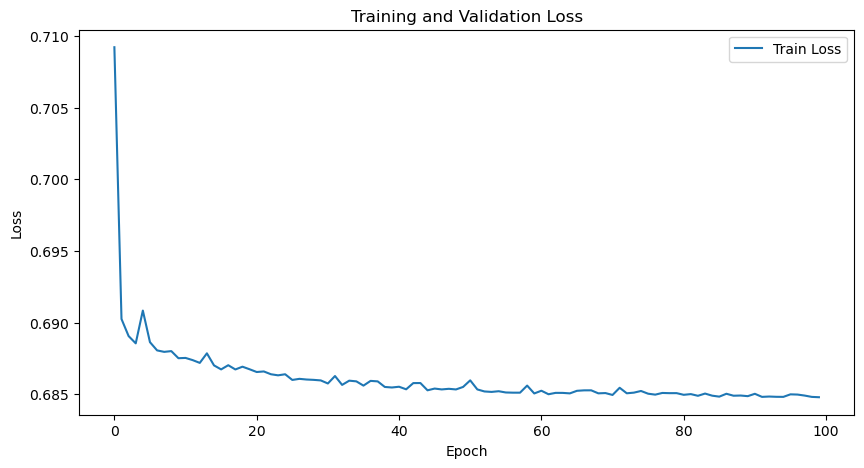

In [14]:
import torch.optim as optim
import torch.nn as nn

dropped = [
  ('Time',''),
]

all_samples = cytof_data['FCS Preprocessed']

# initialize the model
model = HAITiterPredictor(num_markers=4)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
optimizer = optim.AdamW(model.parameters(), lr=1e-2, weight_decay=0.01)
criterion = nn.BCEWithLogitsLoss()
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)

history = {
    'train_loss': [],
    'val_loss': [],
    'val_r2': []
}

train_range = int(len(all_samples)*0.8)
train_cells = all_samples[:train_range].reset_index(drop=True)
val_cells = all_samples[train_range:].reset_index(drop=True)
display(train_range)
display(train_cells)
display(val_cells)

num_epochs = 100

# start training
for epoch in range(num_epochs):
    # train phase
    model.train()
    train_loss = 0.0
    train_order = np.random.permutation(len(train_cells))
    for i in train_order:
        optimizer.zero_grad()
        all_cells = extractFCSDF(train_cells[i], "CyTOF", partition = "known", source = "Preprocessed")
        #cell_picks = np.random.choice(all_cells.shape[0], 50000, replace=False)
        cells = torch.tensor(all_cells.to_numpy(), dtype=torch.float32).to(device)
        cells = cells.unsqueeze(0).expand(8, -1, -1) # for batch size of 8
        titers = torch.tensor(cytof_data['HAI Class'].iloc[i], dtype=torch.float32).to(device)
        titers = titers.unsqueeze(0).expand(8, -1) # for batch size of 8
        # forward pass
        predictions = model(cells)
        loss = criterion(predictions, titers)
        
        # backward pass
        loss.backward()
        optimizer.step()
        del cells
        train_loss += float(loss)
    train_loss /= len(train_cells)
    history['train_loss'].append(train_loss)
  # validation phase
    model.eval()
    val_loss = 0.0
    all_preds = []
    all_targets = []
    with torch.no_grad():
        for i in range(len(val_cells)):
            all_cells = extractFCSDF(val_cells[i], "CyTOF", partition = "known", source = "Preprocessed")
            #cell_picks = np.random.choice(all_cells.shape[0], 16000, replace=False)
            cells = torch.tensor(all_cells.to_numpy(), dtype=torch.float32).to(device)
            cells = cells.unsqueeze(0).expand(8, -1, -1) # for batch size of 8
            titers = torch.tensor(cytof_data['HAI Class'].iloc[i], dtype=torch.float32).to(device)
            titers = titers.unsqueeze(0).expand(8, -1) # for batch size of 8
            predictions = model(cells)
            loss = criterion(predictions, titers)
            val_loss += float(loss)
            del cells
        all_preds.append(predictions.cpu().numpy())
        all_targets.append(titers.cpu().numpy())
      
    val_loss /= len(val_cells)
    history['val_loss'].append(val_loss)
      
    all_preds = np.vstack(all_preds)
    all_targets = np.vstack(all_targets)
  
    scheduler.step(val_loss)
    print(f"Epoch {epoch+1}/{num_epochs}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f}") 

# Save model
torch.save(model.state_dict(), "hai_titer_model.pth")

# plot loss
plt.figure(figsize=(10, 5))
plt.plot(history['train_loss'], label='Train Loss')
#plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.savefig('training_history.png')
plt.show()

In [15]:
import gc

gc.collect()

torch.cuda.empty_cache()

0


array([0.5737439], dtype=float32)

1


array([0.5737439], dtype=float32)

2


array([0.5737439], dtype=float32)

3


array([0.5737439], dtype=float32)

4


array([0.5737439], dtype=float32)

5


array([0.5737439], dtype=float32)

6


array([0.5737439], dtype=float32)

7


array([0.5737439], dtype=float32)

8


array([0.5737439], dtype=float32)

9


array([0.5737439], dtype=float32)

10


array([0.5737439], dtype=float32)

11


array([0.5737439], dtype=float32)

12


array([0.5737439], dtype=float32)

13


array([0.5737439], dtype=float32)

14


array([0.5737439], dtype=float32)

15


array([0.5737439], dtype=float32)

16


array([0.5737439], dtype=float32)

17


array([0.5737439], dtype=float32)

18


array([0.5737439], dtype=float32)

19


array([0.5737439], dtype=float32)

20


array([0.5737439], dtype=float32)

21


array([0.5737439], dtype=float32)

22


array([0.5737439], dtype=float32)

23


array([0.5737439], dtype=float32)

24


array([0.5737439], dtype=float32)

25


array([0.5737439], dtype=float32)

26


array([0.5737439], dtype=float32)

27


array([0.5737439], dtype=float32)

28


array([0.5737439], dtype=float32)

Train Error for dataset:  0.5172413793103449


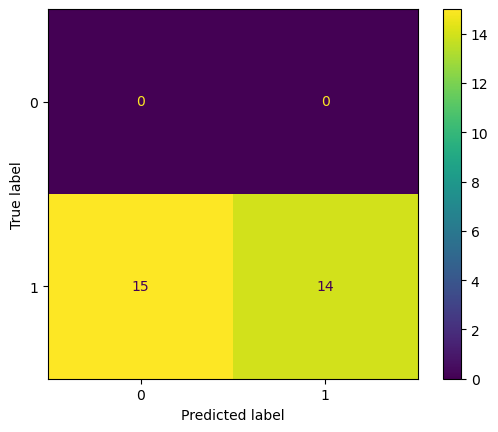

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
Y = cytof_data.loc[:,'HAI Class']
preds = []
for i in range(len(cytof_data)):
    print(i)
    first_subject_data = extractFCSDF(cytof_data.loc[i, 'FCS Preprocessed'], "CyTOF", partition = "known", source = "Preprocessed")
    cells = torch.tensor(first_subject_data.to_numpy(), dtype=torch.float32).to(device)
    cells = cells.unsqueeze(0)
    
    # Get predictions
    model.eval()
    with torch.no_grad():
      predictions = model(cells)
    # Average predictions across batch
    mean_predictions = nn.functional.sigmoid(predictions.mean(dim=0)).cpu().numpy()
    display(mean_predictions)
    for m in mean_predictions:
        if m > 0.5:
            preds.append(1)
        else:
            preds.append(0)
    
error = (preds != Y)
error = error.sum() / len(error)
print("Train Error for dataset: ", error)
cf=confusion_matrix(preds, Y)
cfdall = ConfusionMatrixDisplay(cf)
cfdall.plot()
plt.show()

0


array([0.5737439], dtype=float32)

1


array([0.5737439], dtype=float32)

2


array([0.5737439], dtype=float32)

3


array([0.5737439], dtype=float32)

4


array([0.5737439], dtype=float32)

5


array([0.5737439], dtype=float32)

6


array([0.5737439], dtype=float32)

7


array([0.5737439], dtype=float32)

8


array([0.5737439], dtype=float32)

9


array([0.5737439], dtype=float32)

10


array([0.5737439], dtype=float32)

11


array([0.5737439], dtype=float32)

12


array([0.5737439], dtype=float32)

13


array([0.5737439], dtype=float32)

14


array([0.5737439], dtype=float32)

15


array([0.5737439], dtype=float32)

16


array([0.5737439], dtype=float32)

17


array([0.5737439], dtype=float32)

18


array([0.5737439], dtype=float32)

19


array([0.5737439], dtype=float32)

Train Error for dataset:  0.5


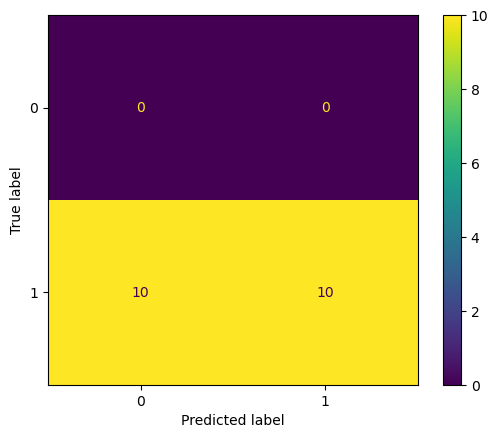

In [27]:
Y = flow_data.loc[:,'HAI Class']
preds = []
for i in range(len(flow_data)):
    print(i)
    first_subject_data = extractFCSDF(flow_data.loc[i, 'FCS Preprocessed'], "Flow", partition = "known", source = "Preprocessed")
    cells = torch.tensor(first_subject_data.to_numpy(), dtype=torch.float32).to(device)
    cells = cells.unsqueeze(0)
    
    # Get predictions
    model.eval()
    with torch.no_grad():
      predictions = model(cells)
    # Average predictions across batch
    mean_predictions = nn.functional.sigmoid(predictions.mean(dim=0)).cpu().numpy()
    display(mean_predictions)
    for m in mean_predictions:
        if m > 0.5:
            preds.append(1)
        else:
            preds.append(0)
    
error = (preds != Y)
error = error.sum() / len(error)
print("Train Error for dataset: ", error)
cf=confusion_matrix(preds, Y)
cfdall = ConfusionMatrixDisplay(cf)
cfdall.plot()
plt.show()

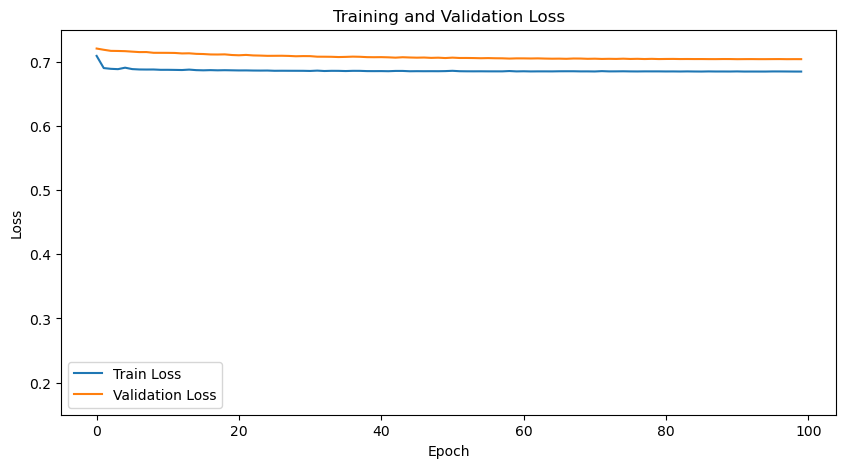

In [32]:
# plot loss
plt.figure(figsize=(10, 5))
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0.15, 0.75) 
plt.legend()
plt.title('Training and Validation Loss')
plt.savefig('training_history.png')
plt.show()